<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Solutions

***

This assignment is due on Moodle by **5pm on Friday June 22**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
from scipy.stats import poisson
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [10 points] Problem 1 

**Part A**:  Your friend is teaching you how to bat in baseball by pitching balls to you as you try to hit them. Sadly, you are not very good. On any given pitch, the probability that you hit the ball is only about 0.05. Your friend needs to know when she'll be able to go home, so she wants to estimate the distribution of the number of balls she will need to throw by the time you get your 10th hit. Luckily, you are better at Data Science than you are at baseball!

Describe **(i)** what distribution could be used to model the system, **(ii)** define any relevant parameters for that distribution and their values, and **(iii)** define the random variable $X$ that follows that distribution, including all values that $X$ can take on.

**Solution:**

**(i)** negative binomial distribution, because we want to model the number of trials needed to observe the 10th success.

**(ii)** $r=10$ successes, and $p=0.05$ probability of success on any given trial

**(iii)** Random variable $X$ represents the number of pitches needed in order to observe the 10th hit. $X$ can take on the values of $k=10, 11, 12, \ldots$ (no theoretical upper bound)

**Part B:**  You are a data-driven transportation engineer investigating the effect that a new stoplight has on city traffic.  The stoplight is located in a high-traffic area, near a large commercial district in your city's downtown, so you want to estimate the distribution of number of cars per hour that pass through the intersection.  You conduct a field study by observing the stoplight all day on Monday and Tuesday one week, and determine that on average 80 cars pass under the stoplight per hour.

Describe **(i)** what distribution could be used to model the system, **(ii)** define any relevant parameters for that distribution and their values, and **(iii)** define the random variable $X$ that follows that distribution, including all values that $X$ can take on. Additionally, **(iv)** do you think it would be appropriate to use the data you collected and the distribution from parts **(i-iii)** to model the arrival of cars at this stoplight on a weekly timescale? Why or why not?

**Solution:**

**(i)** Poisson distribution, to model the number of arrivals per time interval.

**(ii)** $\lambda = 80$ cars/hour

**(iii)** Random variable $X$ represents the number of arrivals in a given one hour time interval. $X$ can take on the values of $k=0, 1, 2, \ldots$ (no theoretical upper bound)

**(iv)** It would **NOT** be appropriate to scale this up to a weekly timescale because the distribution of car arrivals downtown is probably different on weekend days than on weekdays. And you only collected data on weekdays.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [15 points] Problem 2

In this problem you'll get some extra practice writing simple simulations. 

A young boy and an old woman are playing tic tac toe. Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The old woman plays first and randomly places an X in an open square. The boy plays next, and places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, each of the two players' probabilities of winning.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely do not be afraid to write helper functions that are called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an X or an O on an free square, or (iii) check if someone has won the game. Just make sure to clearly display your results in code output and summarize things in Markdown. 

**Solution**: 

There are many ways to simulate the game.  Here is one way: 

In [165]:
def check_board(board): 
    
    board = np.array(board)
    
    # check horizontal 
    for row in [0,3,6]:
        if np.all([(ii+row) in board for ii in range(1,3+1)]):
            return True

    # check vertical 
    for col in [0,1,2]:
        if np.all([(ii+col) in board for ii in [1,4,7]]):
            return True

    # check diagonal 
    if np.all([d in board for d in [1,5,9]]):
        return True 
    if np.all([d in board for d in [3,5,7]]):
        return True 
        
    return False 
    

def tic_tac_trial():
    
    xboard = []
    oboard = []
    open_spaces = list(range(1,9+1))
    
    while len(open_spaces) > 0:
        # place X piece 
        x_place = np.random.choice(open_spaces)
        xboard.append(x_place)
        open_spaces.remove(x_place)
        
        # check if woman has won
        if check_board(xboard):
            return True 
        
        # place O piece 
        if len(open_spaces) > 0: 
            o_place = np.random.choice(open_spaces)
            oboard.append(o_place)
            open_spaces.remove(o_place)
            
        # check if boy has won
        if check_board(oboard):
            return False 
            
    # return false if draw 
    return False

def tic_tac_sim(num_games):
    games = [tic_tac_trial() for ii in range(num_games)]
    return np.sum(games)/num_games

In [198]:
%timeit probX = tic_tac_sim(10000)
print("P(X Wins) = {:.4f}".format(probX))

1 loop, best of 3: 5.73 s per loop
P(X Wins) = 0.5700


In [187]:
from scipy.stats import norm

n = 100
sims = [tic_tac_sim(1000) for _ in range(n)]

alpha = 0.05
zc = norm.ppf(1-alpha*0.5)
ci_lb = np.mean(sims) - zc*np.sqrt(np.var(sims, ddof=1)/n)
ci_ub = np.mean(sims) + zc*np.sqrt(np.var(sims, ddof=1)/n)
print('Confidence interval for first-player win %: [{:.3f}, {:.3f}]'.format(ci_lb, ci_ub))

Confidence interval for first-player win %: [0.581, 0.588]


And here is why 54% to 62% was okay.  Really, we are permitting a $\pm 4$% acceptable error here.

In [197]:
alpha = 0.01
perc_lb = np.percentile(sims, 100*(alpha*.5))
perc_ub = np.percentile(sims, 100*(1-alpha*.5))
print('{:.1f}% of simulations with far-too-few iterations landed in the interval [{:.3f}, {:.3f}]'.format((1-alpha)*100,perc_lb, perc_ub))

99.0% of simulations with far-too-few iterations landed in the interval [0.545, 0.621]


According to our simulation results, we estimate that the old woman will win with approximate probability $0.58$. 

Since P(old woman wins) + P(boy wins) must = 1, we know the probability that the boy wins must be about $0.42$.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [20 points] Problem 3


<img src="http://uploads.neatorama.com/images/posts/870/98/98870/1508255088-0.jpg" style="width: 260px;"/>

Suppose you are baking pies and want to model the probability with which each pie you bake is delicious.  Let $X$ be a random variable representing the **Deliciousness Index (DI)** of a pie, on a scale of $0$ (least delicious) to $\pi$ (a most excellent pie).  The probability density function for $X$ is:

$$
f(x) = \begin{cases}
         c\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

**Solution**: 

We need to choose $c$ such that $f(x)$ integrates to 1.  We have:

$\begin{align}
 1 &\stackrel{\heartsuit}{=} \int_{-\infty}^\infty f(x) dx \\
   &= \int_0^\pi c(\cos{x} +1)dx \\
   &= c \left[ \int_0^\pi \cos{x}dx + \int_0^\pi dx\right] \\
   &= c \sin{x} \bigg|_0^\pi + c\pi \\
   &= c(\sin{\pi} - \sin{0}) + c\pi \\
   &= c\pi \\
\Rightarrow& ~~\fbox{$c=\dfrac{1}{\pi}$}
\end{align}$

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  What should $F(\pi)$ equal?  Be sure to **justify** this answer. Then, verify this answer by calculating $F(\pi)$ from the cdf you derive.

**Solution**:

Integrating from $0$ to $x$, we have...

$\begin{align}
 F(y) &= \int_0^x f(x') dx' \\
      &= \int_0^x \dfrac{1}{\pi}(\cos{x'} + 1)\ dx' \\
      &= \dfrac{1}{\pi} \left[ \sin{x'} + x' \right]\bigg|_0^x \\
      &= \dfrac{1}{\pi} \left[ (\sin{x} + x) - (\sin{0} + 0) \right] \\
      &= \dfrac{1}{\pi} \left(\sin{(x)} + x\right) \\
 \Rightarrow& ~~ \fbox{$F(x) = \dfrac{1}{\pi} \left(\sin{(x)} + x\right)$}
 \end{align}$
 
$F(\pi)$ should equal 1 because $x=\pi$ is the upper bound on the support of $f(x)$. Thus, all of the probability mass must lie below it, making the probability of observing $x \leq \pi$ equal to 1.  We check this:

$F(\pi) = \dfrac{1}{\pi}(\sin{(\pi)} + \pi) = \dfrac{1}{\pi}(0 + \pi) = 1 ~~~ \checkmark$

**Part C**: It is a well-known fact that pies with Deliciousness Index at least 2 are classified as **Quite Tasty**. Use the cdf you computed in **Part B** to find the probability that a single pie you bake is Quite Tasty. 

**Solution**: 

We have:

$\begin{align}
P(X \geq 2) &= 1 - P(X \leq 2) = 1 - F(2) \\
            &= 1 - \dfrac{1}{\pi}(\sin{(2)} + 2) \\
            &\approx 0.0739
\end{align}$

Thus the probability of a single pie being Quite Tasty is about $\fbox{$0.0739$}$

In [158]:
1 - (1/np.pi)*(np.sin(2)+2)

0.073941867192322097

**Part D**: What is the expected Deliciousness Index of any given pie you bake?  Calculate this by hand, using techniques you may or may not need to dust off from Calculus 2. Once you have a final analytic solution (in terms of $\pi$), *then* you should obtain and report an approximate decimal answer.

**Solution**: 

We want to calculate the expected value of $X$:

$\begin{align}
E[X] &= \int_{-\infty}^\infty x f(x) dx = \int_0^\pi x \dfrac{1}{\pi}(\cos{(x)} + 1) dx \\
     &= \dfrac{1}{\pi} \left( \int_0^\pi x \cos{x} ~dx + \int_0^\pi x\ dx \right)\\
     &= \dfrac{1}{\pi} \left( \int_0^\pi x \cos{x} ~dx + \dfrac{1}{2}\pi^2 \right)\\
     &= \dfrac{\pi}{2} + \dfrac{1}{\pi} \int_0^\pi x \cos{x} ~dx \\
\end{align}$

We can integrate by parts, using: 

$\begin{array}{ll}
 u=x   & dv = \cos{x}\ dx \\
 du=dx & v = \sin{x} \ dx \\
 \end{array}$
 
This gives:

$\begin{align}
 \int_0^\pi x \cos{x}\ dx &= uv\bigg|_0^\pi - \int_0^\pi v\ du \\
              &= x \sin{x}\bigg|_0^\pi - \int_0^\pi \sin{x}\ dx \\
              &= 0 + \cos{x}\bigg|_0^\pi \\
              &= \cos{\pi} - \cos{0} \\
              &= -1 - 1 \\
              &= -2
\end{align}$

We plug this into the calculation for $E[X]$:

$\begin{align}
 E[X] &= \dfrac{\pi}{2} + \dfrac{1}{\pi} \int_0^\pi x \cos{x}\ dx \\
      &= \dfrac{\pi}{2} - \dfrac{2}{\pi} \\
      &\approx 0.934
\end{align}$

So our pies have an expected Deliciousness Index of $\fbox{$E[X] = \dfrac{\pi}{2}-\dfrac{2}{\pi} \approx 0.934$}$

In [49]:
np.pi/2 - 2/np.pi

0.9341765544273152

**Part E:**  The symmetric version of our probability density function is $g(x) = c(\cos{(x)}+1), -\pi \leq x \leq \pi$.  $g(x)$ sometimes referred to as the "raised cosine" probability density function. It is often useful as an alternative to a normal distribution.

Name one key difference between the raised cosine and a normal distribution centered at $x=0$.  Describe a situation that would be appropriate to model using one of those probability density functions, but not the other.

**Solution:**

The main difference is that the raised cosine has **finite support** ($x \in [-\pi, \pi]$), whereas the normal distribution has **infinite support** (technically, $x$ could be anything).

So any situation like pie quality, where there is a theoretical upper bound, would be better modeled by a cosine pdf than a normal distribution.  Student grades are one example.  Often, people talk about a normal distribution for student grades, but there are theoretical upper (100) and lower (0) bounds on these!  So, a cosine pdf could be more appropriate.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [20 points] Problem 4

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. So, for example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledger) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ ($0 \leq x \leq 9$) and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [203]:
def pmf_natural(x):
    return np.log10((x + 1)/x)

pmf = np.array([pmf_natural(x) for x in range(1,10)])
print("f(x) \u2265 0 for all x = {}".format(np.all(pmf >= 0)))
print("sum(f(x)) for x = 1, 2, ..., 9 is {}".format(np.sum(pmf)))

f(x) ≥ 0 for all x = True
sum(f(x)) for x = 1, 2, ..., 9 is 0.9999999999999999


**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

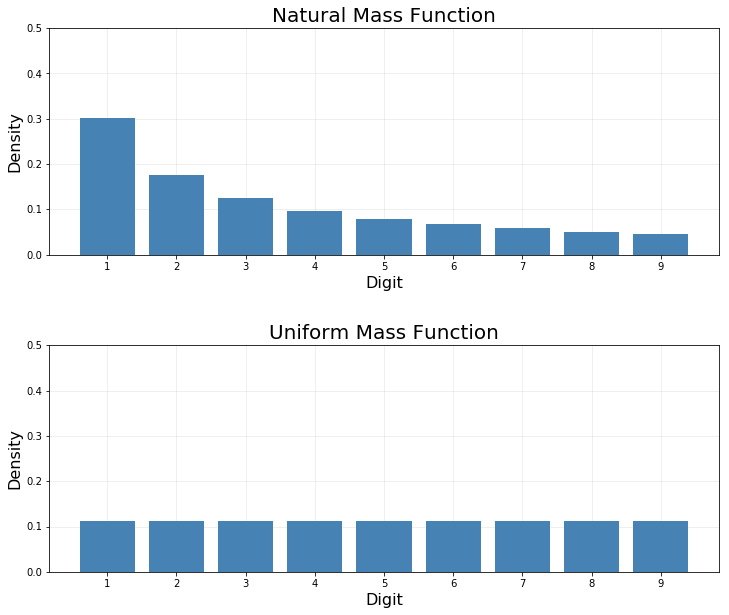

In [204]:
def natural_vs_uniform():
    
    pmf_X = np.array([pmf_natural(x) for x in range(1,10)])
    pmf_U = (1/9) * np.ones(9)
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,10)) 
    
    axes[0].bar(range(1,10), pmf_X, color="steelblue")
    axes[1].bar(range(1,10), pmf_U, color="steelblue")
    
    for ax in axes:
        ax.set_ylim([0,.5])
        ax.grid(True, alpha=0.25)
        ax.set_axisbelow(True)
        ax.set_xlabel("Digit", fontsize=16)
        ax.set_ylabel("Density", fontsize=16)
        plt.sca(ax)
        plt.xticks(range(1,10))
        
    axes[0].set_title("Natural Mass Function", fontsize=20)
    axes[1].set_title("Uniform Mass Function", fontsize=20)
    
    fig.subplots_adjust(hspace=0.4)

    
natural_vs_uniform()

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(x)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 2 and at most 3.

What interesting fact do your results tell you about the relative frequencies of low versus high leading digits, that occur naturally?

In [205]:
def cdf_natural(x):
    
    cdf = 0 
    for aa in range(1, np.min([int(x),9])+1):
        cdf += pmf_natural(aa)
    
    return cdf  

[print("P(x \u2264 {}) = {:.3f}".format(k, cdf_natural(k))) for k in [2,3]];

P(x ≤ 2) = 0.477
P(x ≤ 3) = 0.602


About half of the occurrences of leading digit are 1s or 2s, and the other half are divided between 3, 4, 5, 6, 7, 8, and 9.  How interesting!

**Part D**: The data in [tax_data.txt](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jigc0s4atj24lr) contains the taxable income for individuals in 1978 (available linked here, and on Piazza). Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words.

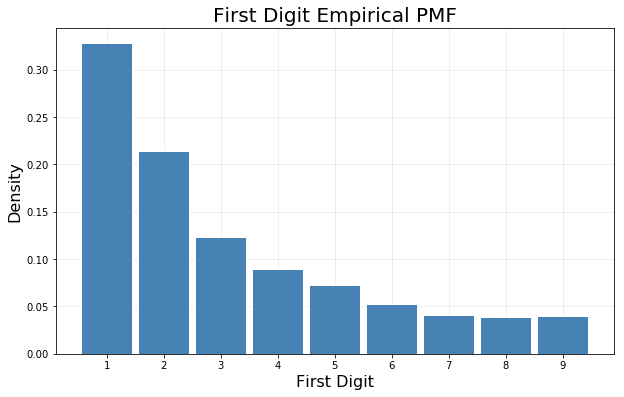

In [211]:
def first_digit(val):
    return int(str(val)[0])

def tax_histogram(df):
    df["First Digit"] = df["taxIncomes"].apply(first_digit)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    
    bins = [ii-.5 for ii in range(1,11)]
    df["First Digit"].hist(ax=ax, bins=bins, color="steelblue", edgecolor="white", rwidth=0.9, normed=True)
    
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
    plt.xticks(range(1,10))
    
    ax.set_title("First Digit Empirical PMF", fontsize=20)
    ax.set_xlabel("First Digit", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    
    
dfTax = pd.read_csv("tax_data.txt", delim_whitespace=True)
tax_histogram(dfTax)

**Solution**: The distribution of first digits in the dataset looks very much like the natural probability mass function and decidedly non-uniform in general.  Thus we conclude that the data is likely **not** fraudulent. 

In [213]:
import os
os.listdir()

['tax_data.txt',
 '.DS_Store',
 'Icon\r',
 'hmwk03_Lastname_Firstname.ipynb',
 'hmwk03_solutions_Tony.ipynb',
 '.ipynb_checkpoints']

<br>

---
<a/ id='p5'></a>
[Back to top](#top)
### [35 points] Problem 5

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

<img src="http://www.panoston.com/wp-content/uploads/2017/08/store-line-1.jpg" style="width: 300px;"/>

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You stand at the front of the store watching the two lines and tabulating the inter-arrival times for each line and find the following:
* John's line checks-out an average of 2 customers per five-minute time slice,
* the self check-out machine checks-out an average of 2.5 customers per five-minute time slice **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per five-minute time slice if the machine is freezing up, and
* the self check-out machine froze up for 2 of the 10 five-minute time slices you observed it.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in-fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 5-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

**Solution**: 

The **number** of customers who pass through each line is well-described by Poisson distributions with rate parameters:
* John: $\lambda = 2$
* Self check-out, working: $\lambda = 2.5$
* Self check-out, frozen: $\lambda = 1$

**Part B**:  What is the probability that 3 customers pass through John's line in the next 5 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

**Solution**:

Below is a function to calculate the Poisson probability of tending `hits` customers in a 5-minute window, given rate parameter `rate`:

In [159]:
def pmf_pois(hits, rate):
    return (rate**hits)*np.exp(-rate)/np.math.factorial(hits)

We calculate the probabilities in the problem as follows:

In [160]:
print('Probability John serves 3 customers in the next 5 minutes = {:0.3f}'.format(pmf_pois(hits=3, rate=2)))
print('... self check-out, working = {:0.3f}'.format(pmf_pois(hits=3, rate=2.5)))
print('... self check-out, frozen = {:0.3f}'.format(pmf_pois(hits=3, rate=1)))

Probability John serves 3 customers in the next 5 minutes = 0.180
... self check-out, working = 0.214
... self check-out, frozen = 0.061


**Part C**:  Use your answer to Part B and the Law of Total Probability to calculate the probability that the self check-out tends 3 customers is the next 5 minutes.

**Solution:**

LTP gives:

$\begin{align}
 P(3) &= P(3 \mid working)P(working) + P(3 \mid frozen)P(frozen) \\
      &= 0.214 \cdot 0.8 + 0.061 \cdot 0.2 \\
      &\approx \fbox{$0.183$}
\end{align}$

In [151]:
print(pmf_pois(hits=3, rate=2.5)*(8/10) + pmf_pois(hits=3, rate=1)*(2/10))

0.183273061839


**Part D**:  S'pose John is working a 4-hour shift from 4-8 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 4-hour interval.)

**Solution:**

The probability that John serves 100 or more customers is 1 minus the probability that he serves 99 or fewer.  The latter probability is the cumulative distribution function for the Poisson distribution describing John's check-out line.

The catch is that we are examining a **4-hour window** instead of our original 5-minute time interval.  So we need to scale the rate parameter acccordingly, where $t$ is the number of time intervals we are examining:
$$\text{new rate} = \lambda t = 2 \cdot \dfrac{\text{4 hours}}{\text{5 minutes}} = 2 \cdot \dfrac{4 \cdot 60}{5} = 96$$

Now for a 4-hour window, the distribution of customers served by John's check-out line $\sim Pois(\lambda t)$, and we need to add up the probability mass for # customers $\leq 99$:

In [201]:
rate1 = 2*4*60/5
cdf = np.sum([pmf_pois(hits=k, rate=rate1) for k in range(100)])
print('P(John serves \u2265 100 customers) = {:0.3f}'.format(1-cdf))

P(John serves ≥ 100 customers) = 0.355


**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 4-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 4-hour shift, and report your result.

Here, your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 4-hour shift. Use at least 5000 simulations.

Finally, use **this same function**, with clever input, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [153]:
# Solution:

# First, a note about the use of np.random.exponential:

# scale parameter in np.random.exponential is 1/lambda (1/rate)
# since E[X] = 1/lambda, 
rate = 2 # lambda
times = np.random.exponential(scale=1/rate, size=100000)
#print('lambda (rate) = {} gives mean(X) = {:0.3f}'.format(rate, np.mean(times)))

# Now, actual code!

def checkout_count(time_len, rate_work, rate_broken, p):
    '''
    time_len    = time interval (minutes)
    rate_work   = rate when machine is working (customers/5 minutes)
    rate_broken = rate when machine is broken (customers/5 minutes)
    p           = probability machine is working
    '''
    working = np.random.choice([True, False], p=[p, 1-p])
    rate = rate_work if working else rate_broken
    time, cust = np.random.exponential(1/rate), 0
    while time <= time_len:
        cust += 1
        working = np.random.choice([True, False], p=[p, 1-p])
        rate = rate_work if working else rate_broken
        time += np.random.exponential(1/rate)
    
    return cust

The following code scales the rate parameters to be in units of "counts per 4-hour interval", so the time length argument of `checkout_count` is 1 (one 4-hour interval).

In [155]:
rate_work = 2.5*4*60/5
rate_broken = 1*4*60/5
p = 0.8
machine = [checkout_count(1, rate_work, rate_broken, p) for k in range(10000)]
p100_machine = len([cnt for cnt in machine if cnt>=100])/len(machine)
print('Probability that the machine serves 100 or more customers in a 4-hour block = {:.3f}'.format(p100_machine))

john = [checkout_count(1, 96, -999, 1) for k in range(10000)]
p100_john = len([cnt for cnt in john if cnt>=100])/len(john)    
print('Probability that John serves 100 or more customers in a 4-hour block = {:.3f}'.format(p100_john))

Probability that the machine serves 100 or more customers in a 4-hour block = 0.268
Probability that John serves 100 or more customers in a 4-hour block = 0.354


**Part F:**  
1. What are the mean numbers of customers served by each of John and the self check-out machine during the 4-hour shift?
2. Which is better for the grocery store in the short-term, the self check-out machine technology, or folks like John Henry?  Justify your answer with some figures or calculations that you feel will be appropriate, or shout-outs to results you have already calculated.
3. What if they improve the self check-out machine to only fail 10% of the time?

**Solution:**

John Henry is a bad dude.  The grocery store should invest in him!  On average, he served about 4 more customers over the course of 4 hours than the machine:

In [140]:
print('Mean customers served by John = {:.3f}'.format(np.mean(john)))
print('Mean customers served by Machine = {:.3f}'.format(np.mean(machine)))

Mean customers served by John = 96.005
Mean customers served by Machine = 92.612


And the machine has a longer left tail of its empirical distribution of customers served, as seen below.  This is attributed to the fact that the machine breaks down 20% of the time, slowing things down.  If the grocery store invested in improving this rate to 10%, then its performance dramatically improves to serving an average of 104 customers per 4-hour shift, and topping 100 customers served with a probability of 62.7% (see below).

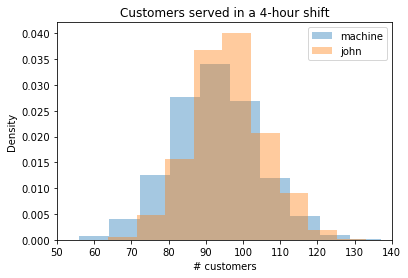

In [139]:
plt.hist(machine, alpha=0.4, label='machine', normed=True)
plt.hist(john, alpha=0.4, label='john', normed=True)
plt.xlim([50,140])
plt.xlabel('# customers')
plt.ylabel('Density')
plt.title('Customers served in a 4-hour shift')
plt.legend();

In [147]:
rate_work = 2.5*4*60/5
rate_broken = 1*4*60/5
p = 0.9
machine = [checkout_count(1, rate_work, rate_broken, p) for k in range(10000)]
p100_machine = len([cnt for cnt in machine if cnt>100])/len(machine)
print('Probability that the machine serves 100 or more customers in a 4-hour block = {:.3f}'.format(p100_machine))
print('Mean customers served by Machine = {:.3f}'.format(np.mean(machine)))

Probability that the machine serves 100 or more customers in a 4-hour block = 0.630
Mean customers served by Machine = 104.451
